In [42]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
%matplotlib inline

#read data 
df = pd.read_csv('combined.csv')
df.info()

# Preprocess data
AOTRoute = pd.Series(np.where(((df['AOTROUTE'] != 'US-7')&(df['AOTROUTE'] != 'I-89')&
                            (df['AOTROUTE'] != 'I-91')&(df['AOTROUTE'] != 'US-2')&
                            (df['AOTROUTE'] != 'US-5')&(df['AOTROUTE'] != 'VT-15')&
                            (df['AOTROUTE'] != 'VT-100')&(df['AOTROUTE'] != 'VT-9')&
                            (df['AOTROUTE'] != 'VT-2A')&(df['AOTROUTE'] != 'US-4')),'Other Route',df.AOTROUTE))
AOTRoute = pd.get_dummies(AOTRoute)

# get dummies for animal --> get "none" column for yes/no
animal = pd.get_dummies(df['Animal'])['None/Other']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
animal = pd.Series(np.where(np.array(animal)==0,1,0))

city_town = pd.Series(np.where(((df['CITYORTOWN'] != 'Burlington')&(df['CITYORTOWN'] != 'Brattleboro')&
                            (df['CITYORTOWN'] != 'South Burlington')&(df['CITYORTOWN'] != 'Essex')&
                            (df['CITYORTOWN'] != 'Bennington')&(df['CITYORTOWN'] != 'Williston')&
                            (df['CITYORTOWN'] != 'Colchester')&(df['CITYORTOWN'] != 'Springfield')&
                            (df['CITYORTOWN'] != 'Hartford')&(df['CITYORTOWN'] != 'Milton')),'Other City',df.CITYORTOWN))
city_town = pd.get_dummies(city_town)

# DayNight --> save "night" case only as yes/no
night=pd.get_dummies(df['DayNight'])['Night']

# Impairment --> get "none" column for yes/no
impairment=pd.get_dummies(df['Impairment'])['None']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
impairment = pd.Series(np.where(np.array(impairment)==0,1,0))

# get dummies for Involving
involving = pd.get_dummies(df['Involving'])
# remove "none" column which is the null case
involving = involving.drop(columns = ['None'])

# Get dummies for road condition
roadcondition = pd.get_dummies(df['RoadCondition'])
# drop "none" column which is the null case, unreported situations, and the surface condition; will add in later
roadcondition = roadcondition.drop(columns=['None', 'Other - Explain in Narrative', 'Not reported', 'Unknown',
                                            'Road Surface Condition(wet, icy, snow, slush, etc)'])

# get dummies for surface condition
surfacecondition = pd.get_dummies(df['SurfaceCondition'])
# drop "dry" column which is the null case along with unreported situations
surfacecondition = surfacecondition.drop(columns=['Dry', 'Not Reported', 'Other - Explain in Narrative', 'Unknown'])

# get dummies for weather
weather = pd.get_dummies(df['Weather'])
# drop "clear" column which is the null case along with unreported situations
weather = weather.drop(columns=['Clear', 'Unknown'])

# get accident dates
datetime = df['ACCIDENTDATE']
months = '' # new string
# use loop to extract month from date string
for i in range(len(datetime)):
    match = re.search(r'\d{4}-\d{2}-\d{2}', datetime[i]).group()
    months += match[5:7] + ','
# remove last extraneous comma from loop
months = months[:-1]
# split comma separated string
months = months.split(",")
# convert to DataFrame
months = pd.Series(months)

# determine season
seasons = ""
for i in range(len(months)):
    if months[i]=='12':
        seasons += 'Winter' + ','
    if months[i]=='01':
        seasons += 'Winter' + ','
    if months[i]=='02':
        seasons += 'Winter' + ','
    if months[i]=='03':
        seasons += 'Spring' + ','
    if months[i]=='04':
        seasons += 'Spring' + ','
    if months[i]=='05':
        seasons += 'Spring' + ','
    if months[i]=='06':
        seasons += 'Summer' + ','
    if months[i]=='07':
        seasons += 'Summer' + ','
    if months[i]=='08':
        seasons += 'Summer' + ','
    if months[i]=='09':
        seasons += 'Fall' + ','
    if months[i]=='10':
        seasons += 'Fall' + ','
    if months[i]=='11':
        seasons += 'Fall' + ','
# remove last extraneous comma from loop
seasons = seasons[:-1]
# split comma separated string
seasons = seasons.split(",")
# convert to DataFrame
seasons = pd.Series(seasons)
seasons = pd.get_dummies(seasons)

injury = df['InjuryType'].copy()

for i in range(len(injury)):
    if injury.loc[i] == 'Property Damage Only':
        injury.loc[i] = 0
    else:
        injury.loc[i] = 1

# Build data frame for RF
ann_df = pd.concat([animal, night, impairment], axis=1)
ann_df.columns=['Animal', 'Night', 'Impairment']
ann_df = pd.concat([ann_df, AOTRoute, city_town, involving, roadcondition, surfacecondition, weather, seasons,injury],
                   axis=1, sort=False)

ann_df.rename(columns={'InjuryType':'injury'},  inplace=True)
ann_df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49636 entries, 0 to 49635
Data columns (total 30 columns):
Unnamed: 0              49636 non-null int64
ACCIDENTDATE            49636 non-null object
AOTACTUALMILEPOINT      49636 non-null object
AOTROUTE                49299 non-null object
Animal                  49636 non-null object
CITYORTOWN              49505 non-null object
DIROFCOLLI              37121 non-null object
DayNight                49636 non-null object
HOWMAPPED               49110 non-null object
INTERSECTIONWITH        40181 non-null object
Impairment              49636 non-null object
InjuryType              49636 non-null object
Involving               49636 non-null object
LAT_DD                  49110 non-null float64
LOCALID                 39326 non-null float64
LOC_ERROR               49636 non-null object
LONG_DD                 49110 non-null float64
LRSNUMBER               49636 non-null object
NonReportableAddress    49636 non-null object
REPORTINGAGENCY

,count,mean,std,min,25%,50%,75%,max
Animal,49636.0,0.032053,0.176144,0.0,0.0,0.0,0.0,1.0
Night,49636.0,0.246938,0.431235,0.0,0.0,0.0,0.0,1.0
Impairment,49636.0,0.052905,0.223846,0.0,0.0,0.0,0.0,1.0
I-89,49636.0,0.067935,0.251636,0.0,0.0,0.0,0.0,1.0
I-91,49636.0,0.044988,0.207279,0.0,0.0,0.0,0.0,1.0
Other Route,49636.0,0.627105,0.483579,0.0,0.0,1.0,1.0,1.0
US-2,49636.0,0.041059,0.198428,0.0,0.0,0.0,0.0,1.0
US-4,49636.0,0.014506,0.119564,0.0,0.0,0.0,0.0,1.0
US-5,49636.0,0.038641,0.192741,0.0,0.0,0.0,0.0,1.0
US-7,49636.0,0.079136,0.269954,0.0,0.0,0.0,0.0,1.0


In [52]:
# separate out y from x
y = ann_df['injury']
x = ann_df.drop(columns = ['injury'])

In [53]:
# Data partition
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_x,test_x = train_test_split(y, x,
                                                 test_size=0.2,
                                                 random_state=123)

Because all our variables are dummy variables and are in the range (0,1), no scaling is required.

In [54]:
# feature selection
from sklearn.ensemble import RandomForestRegressor

# Train an RF regressor
rf = RandomForestRegressor(n_estimators=50, max_features=30, random_state=123)

In [55]:
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

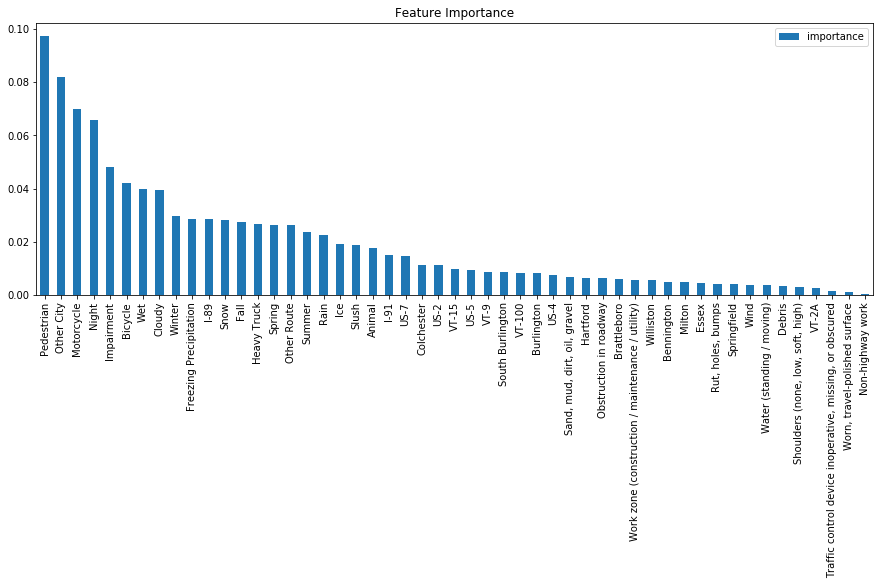

In [59]:
# importance scores
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_x.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

#bar chart
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance')

In [84]:
# Select the 10 most importance features
train_x_imp = train_x[feature_importances.index[range(10)]]
train_x_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39708 entries, 42286 to 15725
Data columns (total 10 columns):
Pedestrian                39708 non-null uint8
Other City                39708 non-null uint8
Motorcycle                39708 non-null uint8
Night                     39708 non-null uint8
Impairment                39708 non-null int64
Bicycle                   39708 non-null uint8
Wet                       39708 non-null uint8
Cloudy                    39708 non-null uint8
Winter                    39708 non-null uint8
Freezing Precipitation    39708 non-null uint8
dtypes: int64(1), uint8(9)
memory usage: 969.4 KB


In [85]:
test_x_imp = test_x[feature_importances.index[range(10)]]
test_x_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 49192 to 43321
Data columns (total 10 columns):
Pedestrian                9928 non-null uint8
Other City                9928 non-null uint8
Motorcycle                9928 non-null uint8
Night                     9928 non-null uint8
Impairment                9928 non-null int64
Bicycle                   9928 non-null uint8
Wet                       9928 non-null uint8
Cloudy                    9928 non-null uint8
Winter                    9928 non-null uint8
Freezing Precipitation    9928 non-null uint8
dtypes: int64(1), uint8(9)
memory usage: 242.4 KB


In [67]:
from sklearn import neural_network
from sklearn import metrics

In [64]:
ann1 = neural_network.MLPRegressor(alpha=1e-5,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [66]:
ann1.fit(train_x, train_y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [68]:
#predict accuracy on test
pred_y1 = ann1.predict(test_x)
pd.Series(pred_y1).describe()

count    9928.000000
mean        0.202499
std         0.144081
min        -0.141342
25%         0.096303
50%         0.203048
75%         0.246081
max         1.096072
dtype: float64

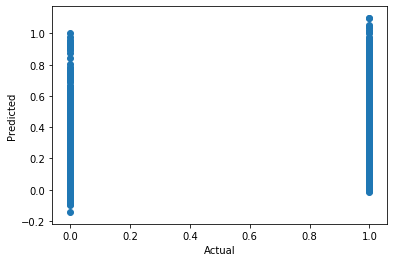

In [69]:
plt.scatter(test_y, pred_y1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [70]:
# Specify an ANN model, use 3 hidden layers
ann2 = neural_network.MLPRegressor(solver='lbfgs',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [71]:
ann2.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 15, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [72]:
pred_y2 = ann2.predict(test_x)
pd.Series(pred_y2).describe()

count    9928.000000
mean        0.203291
std         0.150487
min        -0.047877
25%         0.089724
50%         0.192029
75%         0.253181
max         1.070243
dtype: float64

Text(0, 0.5, 'Predicted')

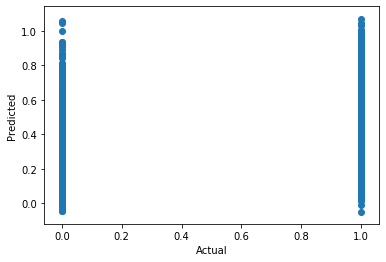

In [73]:
plt.scatter(test_y, pred_y2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

It is quite obvious that there is little accuracy for the models using all predictors. We must reduce dimensionality by using only important predictors.

In [86]:
ann3 = neural_network.MLPRegressor(solver='lbfgs',
                                   alpha=1e-5,
                                   random_state=1)

In [87]:
ann3.fit(train_x_imp, train_y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [88]:
pred_y3 = ann3.predict(test_x_imp)
pd.Series(pred_y3).describe()

count    9928.000000
mean        0.202871
std         0.131285
min         0.064548
25%         0.102379
50%         0.195514
75%         0.232223
max         0.997859
dtype: float64

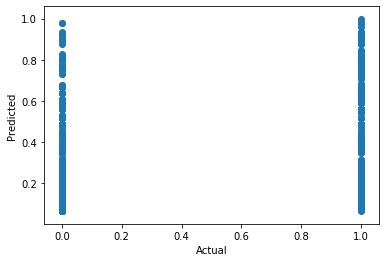

In [89]:
plt.scatter(test_y, pred_y3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [90]:
ann4 = neural_network.MLPRegressor(solver='lbfgs',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [91]:
ann4.fit(train_x_imp, train_y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 15, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [92]:
pred_y4 = ann4.predict(test_x_imp)
pd.Series(pred_y4).describe()

count    9928.000000
mean        0.203072
std         0.131515
min         0.071866
25%         0.104140
50%         0.205026
75%         0.228387
max         1.014065
dtype: float64

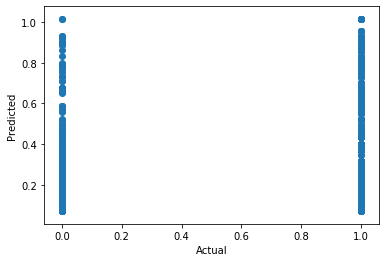

In [93]:
plt.scatter(test_y, pred_y4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()